<center>

# NLP_08 : GloVe Embeddings

</center>


## What is GloVe?

**GloVe (Global Vectors for Word Representation)** is a **word embedding technique** that represents words as **dense vectors** in a continuous vector space.  

It was developed by **Stanford University** and combines the strengths of:
- **Matrix factorization methods** (like LSA)  
- **Predictive methods** (like Word2Vec)

Unlike Word2Vec, **GloVe explicitly uses the co-occurrence matrix of words** across the corpus to capture semantic meaning.

## Example

Corpus: I love NLP. NLP is fun.


Co-occurrence matrix (simplified):

|      | I | love | NLP | is | fun |
|------|---|------|-----|----|-----|
| I    | 0 | 1    | 1   | 0  | 0   |
| love | 1 | 0    | 1   | 0  | 0   |
| NLP  | 1 | 1    | 0   | 1  | 1   |
| is   | 0 | 0    | 1   | 0  | 1   |
| fun  | 0 | 0    | 1   | 1  | 0   |

GloVe factorizes this matrix → produces **dense embeddings** for each word.


## Key Idea

- Words that appear in **similar contexts** have **similar vector representations**  
- GloVe constructs a **word-word co-occurrence matrix** from the corpus  
- Then it factorizes this matrix to produce **word embeddings**  

### Formula (High-Level)
$$F(w_i, w_j) = \text{Probability that word } w_j \text{ appears in the context of } w_i$$

The optimization finds vectors such that:
$$
v_i^T v_j + b_i + b_j \approx \log(X_{ij})$$


Where:

\begin{array}{ll}
    v_i, v_j & \text{= word vectors} \\
    b_i, b_j & \text{= biases} \\
    X_{ij} & \text{= co-occurrence count of words } i \text{ and } j
\end{array}

### Why GloVe is Used
- To capture **semantic relationships** between words  
- To represent words in a **dense, continuous vector space**  
- To understand meaning based on **how words appear together globally**  
- To perform tasks like **similarity search, analogy solving, and clustering**

### Why We Use Pretrained GloVe
- Training GloVe from scratch requires **huge datasets and memory**
- Pretrained GloVe models are trained on **Wikipedia and Gigaword**
- They provide **high-quality embeddings instantly**
- Ideal for **learning, experimentation, and real-world NLP tasks**


In [1]:
import gensim.downloader as api
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
# Load pre-trained GloVe embeddings (300d)
print("Loading GloVe embeddings...")
glove_model = api.load('glove-wiki-gigaword-300')

Loading GloVe embeddings...


In [3]:
print("GloVe embeddings loaded!")

GloVe embeddings loaded!


In [4]:
#  Check Vocabulary Size
print("Vocabulary size:", len(glove_model))

Vocabulary size: 400000


In [5]:
# Example: get vector for 'python'
python_vec = glove_model["python"]
print("Vector for 'python':\n", python_vec)

Vector for 'python':
 [-0.68621   -0.21032    0.30084   -0.20957   -0.14055    0.16589
 -0.063815   0.0059568 -0.2608     0.088066   0.5125     0.22194
 -0.37158   -0.50861   -0.19353    0.19317    0.17522    1.1519
 -0.12096    0.48303    0.12671   -0.31634   -0.26484    0.45473
  0.58656    0.10564   -0.42468   -0.20019   -0.12232    0.23498
 -0.14227   -0.0071912 -0.088289   0.1686     0.69459   -0.44517
 -0.089346   0.24907   -0.03589    0.66685   -0.99037   -0.41848
  0.080304  -0.3765     0.10004   -0.38665    0.21034    0.21951
 -0.35469   -0.58495   -0.098741  -0.54389    0.016027   0.49783
 -0.25077   -0.070697   0.043938  -0.20334    0.18493    0.37715
 -0.027792  -0.3409     0.35424    0.2503     1.0732     0.32722
  0.63153    0.13235    0.65615    0.34681   -0.44       1.6248
  0.061438   0.049767   0.23996    0.60233    0.56783   -0.10919
  0.53128    0.37517    0.032873  -0.2151    -0.064148  -0.52455
  0.20949    0.017939   0.43503    0.20134   -0.28045   -0.35473
 -0.6

In [6]:
# Find similar words
glove_model.most_similar("girl")

[('boy', 0.8272891044616699),
 ('woman', 0.729641854763031),
 ('girls', 0.7227292060852051),
 ('teenager', 0.6509774327278137),
 ('teenage', 0.6492719054222107),
 ('mother', 0.6417974829673767),
 ('boys', 0.6283578872680664),
 ('child', 0.6229295134544373),
 ('teen', 0.612524151802063),
 ('daughter', 0.6050207614898682)]

In [7]:
similarity = glove_model.similarity("car", "automobile")
print("Similarity between car and automobile:", similarity)

Similarity between car and automobile: 0.5955729


In [8]:
glove_model.most_similar(positive=['boy', 'queen'], negative=['girl'], topn=1)

[('king', 0.6770139932632446)]

In [9]:
# Select words to visualize
words = ['king', 'queen', 'man', 'woman', 'apple', 'orange', 'cat', 'dog', 'paris', 'france', 'london', 'england']

In [11]:
# Extract vectors and convert to NumPy array
import numpy as np
word_vectors = np.array([glove_model[word] for word in words])  # Convert list -> np.array

In [12]:
# TSNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # Set small perplexity because n_samples=12
word_vectors_2d = tsne.fit_transform(word_vectors)

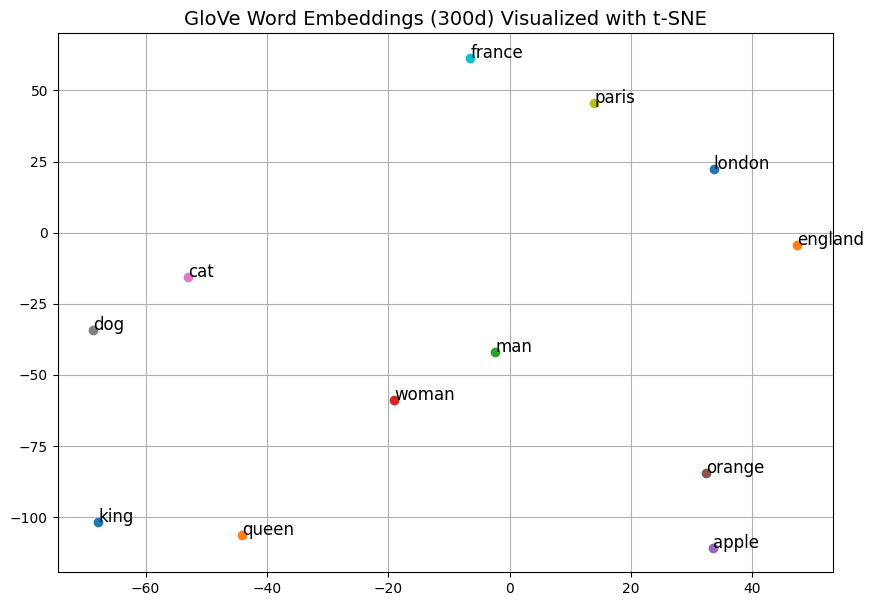

In [13]:
# Plot
plt.figure(figsize=(10, 7))
for i, word in enumerate(words):
    x, y = word_vectors_2d[i]
    plt.scatter(x, y)
    plt.text(x+0.02, y+0.02, word, fontsize=12)
plt.title("GloVe Word Embeddings (300d) Visualized with t-SNE", fontsize=14)
plt.grid(True)
plt.show()

## Advantages of GloVe

- Captures **semantic meaning** of words  
- Pre-trained vectors available → easy to use  
- Works well for **similarity and analogy tasks**  
- Dense vectors → lower memory usage than BoW or TF-IDF  

## Limitations of GloVe

- Context-independent → same word has same vector in all contexts  
- Cannot handle **out-of-vocabulary (OOV) words**  
- Needs large corpora to learn good embeddings


## Word2Vec vs GloVe (Comparison Table)

| Feature | Word2Vec | GloVe |
|------|---------|-------|
| Model type | Predictive | Count-based |
| Training method | Neural network | Matrix factorization |
| Context used | Local context window | Global co-occurrence |
| Architectures | CBOW, Skip-Gram | Single model |
| Captures semantics | Yes | Yes |
| Training speed | Fast | Moderate |
| Pre-trained availability | Yes | Yes |
| Handles rare words | Better with Skip-Gram | Depends on corpus size |
| Out-of-vocabulary words | Not supported | Not supported |

## When to Use Which?

- Use **Word2Vec** when:
  - You want faster training
  - You have a large corpus
  - You want flexibility (CBOW or Skip-Gram)

- Use **GloVe** when:
  - You want global semantic information
  - You prefer stable pre-trained embeddings
  - You are doing similarity or analogy tasks

## Applications and Use Cases

Both Word2Vec and GloVe have been successfully applied in:

- Text classification
- Sentiment analysis
- Information retrieval
- Word similarity and analogy tasks

## Summary

- Word2Vec is a **predictive, neural network–based** model
- GloVe is a **count-based, matrix factorization** model
- Both produce dense word embeddings
- Choice depends on dataset size and task requirements


<div style="text-align: right;">
    <b>Author:</b> Monower Hossen <br>
    <b>Date:</b> January 10, 2026
</div>
